In [95]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
import numpy as np

In [96]:
INPUT_FILE = 'test_big.in'
OUTPUT_FILE = 'output_big.txt'

In [97]:
class Cycle():
    def __init__(self):
        self.x = []
        self.y = []
    
    def append_x(self, x: float):
        self.x.append(x)
        
    def append_y(self, y: float):
        self.y.append(y)

In [98]:
n_bodies: int
n_cycles: int
with open(INPUT_FILE) as inp:
    first_line = inp.readline().split()
    n_bodies = int(first_line[1])
    n_cycles = int(first_line[2])
    
n_cycles

10000

In [99]:
cycles = [Cycle() for _ in range(n_cycles)]

In [100]:
with open(OUTPUT_FILE) as src:
    for i in range(n_cycles):
        src.readline()
        src.readline()
        for _ in range(n_bodies):
            line = src.readline().split()
            cycles[i].append_x(float(line[3]))
            cycles[i].append_y(float(line[4]))

In [101]:
x_min = min([min(cur_cycle.x) for cur_cycle in cycles])
x_max = max([max(cur_cycle.x) for cur_cycle in cycles])

y_min = min([min(cur_cycle.y) for cur_cycle in cycles])
y_max = max([max(cur_cycle.y) for cur_cycle in cycles])

In [102]:
# import random
# categories = np.array([random.randint(0, 3) for _ in range(4)])
# colormap = np.array(['r', 'g', 'b', 'yellow'])
# plt.scatter([1, 2, 3, 4], [1, 2, 3, 4], c=colormap[categories])

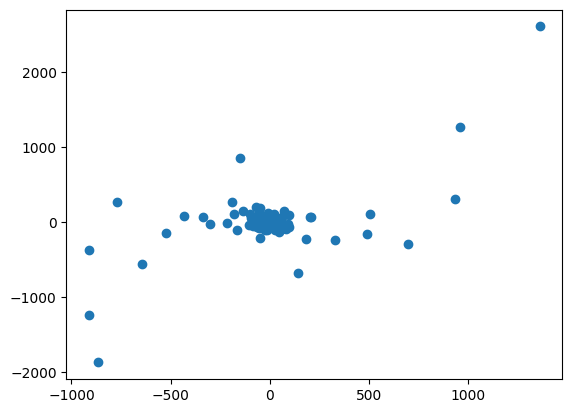

In [103]:
plt.scatter(cycles[200].x, cycles[200].y)

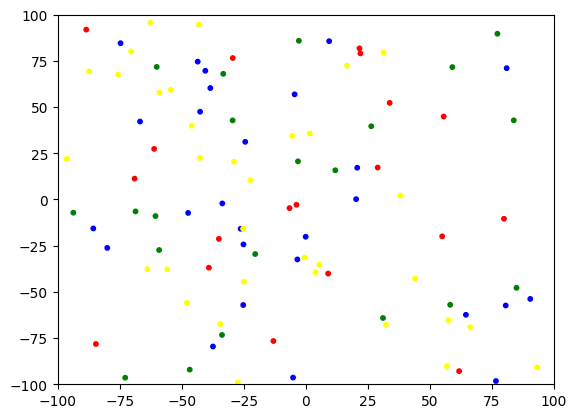

In [104]:
import matplotlib.animation as animation
import random

fig, ax = plt.subplots()
plt.xlim(-100, 100)
plt.ylim(-100, 100)
x = cycles[0].x
y = cycles[0].y

categories = np.array([random.randint(0, 3) for _ in range(n_bodies)])
colormap = np.array(['r', 'g', 'b', 'yellow'])

scatter = ax.scatter(x, y, s=10, c=colormap[categories])

def update(i):
    x = cycles[i].x
    y = cycles[i].y
    scatter.set_offsets(np.column_stack((x, y)))
    return scatter,

ani = animation.FuncAnimation(fig, update, frames=200, interval=80)
ani.save('animation_big.mp4', writer='ffmpeg')
